In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=8,3
sns.set_theme(style="whitegrid", palette="dark")

In [2]:
soil=pd.read_csv(r'C:\Users\admin\Downloads\archive\soil_pollution_diseases.csv')

In [3]:
soil

Case_ID Date_Reported         Region    Country Pollutant_Type  \
0     CASE_100000    2024-09-12         Africa   Pakistan           Lead   
1     CASE_100001    2024-01-01         Africa    Germany           Lead   
2     CASE_100002    2025-02-24         Europe    Germany           Lead   
3     CASE_100003    2024-09-24           Asia        USA           Lead   
4     CASE_100004    2023-05-24         Africa      India       Chromium   
...           ...           ...            ...        ...            ...   
2995  CASE_102995    2024-04-08           Asia     Mexico        Mercury   
2996  CASE_102996    2024-12-28           Asia  Australia     Pesticides   
2997  CASE_102997    2023-07-15         Europe      India       Chromium   
2998  CASE_102998    2024-07-30           Asia        USA           Lead   
2999  CASE_102999    2024-09-04  North America      China        Cadmium   

      Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                             78.04     8.30           35.6        64.9   
1                             16.33     7.96           31.0        73.1   
2                            167.33     5.35           16.4        33.8   
3                             89.23     5.66           31.4        30.5   
4                             93.93     7.64           17.0        58.6   
...                             ...      ...            ...         ...   
2995                          14.27     7.06           12.3        75.0   
2996                         110.21     5.23           25.4        80.0   
2997                         146.15     5.25           35.8        56.0   
2998                         143.18     4.63           20.4        85.3   
2999                         146.93     6.99           36.6        74.4   

      Rainfall_mm  ... Soil_Texture Soil_Organic_Matter_%  \
0            62.4  ...        Sandy                  1.98   
1             8.2  ...        Silty                  9.71   
2           121.7  ...         Clay                  5.49   
3           116.9  ...        Silty                  3.98   
4           237.0  ...        Loamy                  0.94   
...           ...  ...          ...                   ...   
2995        215.6  ...        Silty                  2.39   
2996        184.8  ...         Clay                  1.91   
2997        181.5  ...        Silty                  8.59   
2998          7.3  ...        Silty                  5.68   
2999        276.8  ...        Silty                  8.30   

                  Disease_Type Disease_Severity       Health_Symptoms  \
0     Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                       Cancer             Mild  Breathing Difficulty   
2     Gastrointestinal Disease           Severe                Nausea   
3        Neurological Disorder           Severe               Fatigue   
4                 Skin Disease         Moderate  Breathing Difficulty   
...                        ...              ...                   ...   
2995        Respiratory Issues           Severe        Abdominal Pain   
2996     Neurological Disorder           Severe  Breathing Difficulty   
2997                    Cancer             Mild               Fatigue   
2998     Neurological Disorder             Mild        Abdominal Pain   
2999        Respiratory Issues             Mild  Breathing Difficulty   

      Age_Group_Affected Gender_Most_Affected       Mitigation_Measure  \
0                 Adults                 Male    Government Regulation   
1                Elderly                 Both      Community Awareness   
2               Children                 Both         Soil Remediation   
3                 Adults                 Male      Community Awareness   
4               Children               Female    Government Regulation   
...                  ...                  ...                      ...   
2995             Elderly                 Both            Crop Rotati

In [4]:
soil.shape

(3000, 24)

In [5]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3000 non-null   object 
 1   Date_Reported                  3000 non-null   object 
 2   Region                         3000 non-null   object 
 3   Country                        3000 non-null   object 
 4   Pollutant_Type                 3000 non-null   object 
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64
 6   Soil_pH                        3000 non-null   float64
 7   Temperature_C                  3000 non-null   float64
 8   Humidity_%                     3000 non-null   float64
 9   Rainfall_mm                    3000 non-null   float64
 10  Crop_Type                      3000 non-null   object 
 11  Farming_Practice               3000 non-null   object 
 12  Nearby_Industry                2418 non-null   o

In [6]:
soil.isnull().sum()

Case_ID                            0
Date_Reported                      0
Region                             0
Country                            0
Pollutant_Type                     0
Pollutant_Concentration_mg_kg      0
Soil_pH                            0
Temperature_C                      0
Humidity_%                         0
Rainfall_mm                        0
Crop_Type                          0
Farming_Practice                   0
Nearby_Industry                  582
Water_Source_Type                  0
Soil_Texture                       0
Soil_Organic_Matter_%              0
Disease_Type                       0
Disease_Severity                   0
Health_Symptoms                    0
Age_Group_Affected                 0
Gender_Most_Affected               0
Mitigation_Measure                 0
Case_Resolved                      0
Follow_Up_Required                 0
dtype: int64

In [7]:
soil['Nearby_Industry']=soil['Nearby_Industry'].fillna(soil['Nearby_Industry'].mode()[0])

In [8]:
soil.columns

Index(['Case_ID', 'Date_Reported', 'Region', 'Country', 'Pollutant_Type',
       'Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C',
       'Humidity_%', 'Rainfall_mm', 'Crop_Type', 'Farming_Practice',
       'Nearby_Industry', 'Water_Source_Type', 'Soil_Texture',
       'Soil_Organic_Matter_%', 'Disease_Type', 'Disease_Severity',
       'Health_Symptoms', 'Age_Group_Affected', 'Gender_Most_Affected',
       'Mitigation_Measure', 'Case_Resolved', 'Follow_Up_Required'],
      dtype='object')

In [9]:
len(soil.columns)

24

In [10]:
soil.dtypes

Case_ID                           object
Date_Reported                     object
Region                            object
Country                           object
Pollutant_Type                    object
Pollutant_Concentration_mg_kg    float64
Soil_pH                          float64
Temperature_C                    float64
Humidity_%                       float64
Rainfall_mm                      float64
Crop_Type                         object
Farming_Practice                  object
Nearby_Industry                   object
Water_Source_Type                 object
Soil_Texture                      object
Soil_Organic_Matter_%            float64
Disease_Type                      object
Disease_Severity                  object
Health_Symptoms                   object
Age_Group_Affected                object
Gender_Most_Affected              object
Mitigation_Measure                object
Case_Resolved                     object
Follow_Up_Required                object
dtype: object

In [11]:
soil.describe()

Pollutant_Concentration_mg_kg      Soil_pH  Temperature_C   Humidity_%  \
count                    3000.000000  3000.000000    3000.000000  3000.000000   
mean                      102.745587     6.463747      27.225100    58.222867   
std                        55.907366     1.166305      10.084577    21.357711   
min                         5.030000     4.500000      10.000000    20.000000   
25%                        54.425000     5.457500      18.500000    39.900000   
50%                       104.085000     6.450000      27.000000    58.450000   
75%                       151.472500     7.490000      35.825000    76.800000   
max                       199.990000     8.500000      45.000000    95.000000   

       Rainfall_mm  Soil_Organic_Matter_%  
count   3000.00000            3000.000000  
mean     200.31660               5.175093  
std      115.27187               2.761633  
min        0.00000               0.500000  
25%      100.60000               2.760000  
50%      199.00000               5.130000  
75%      299.75000               7.550000  
max      399.70000              10.000000

In [12]:
soil.describe().transpose()

count        mean         std    min  \
Pollutant_Concentration_mg_kg  3000.0  102.745587   55.907366   5.03   
Soil_pH                        3000.0    6.463747    1.166305   4.50   
Temperature_C                  3000.0   27.225100   10.084577  10.00   
Humidity_%                     3000.0   58.222867   21.357711  20.00   
Rainfall_mm                    3000.0  200.316600  115.271870   0.00   
Soil_Organic_Matter_%          3000.0    5.175093    2.761633   0.50   

                                    25%      50%       75%     max  
Pollutant_Concentration_mg_kg   54.4250  104.085  151.4725  199.99  
Soil_pH                          5.4575    6.450    7.4900    8.50  
Temperature_C                   18.5000   27.000   35.8250   45.00  
Humidity_%                      39.9000   58.450   76.8000   95.00  
Rainfall_mm                    100.6000  199.000  299.7500  399.70  
Soil_Organic_Matter_%            2.7600    5.130    7.5500   10.00

In [13]:
soil.columns=['Case_ID', 'Date_Reported', 'Region', 'Country', 'Pollutant_Type', 'Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C','Humidity', 'Rainfall_mm', 'Crop_Type', 'Farming_Practice','Nearby_Industry', 'Water_Source_Type', 'Soil_Texture','Soil_Organic_Matter', 'Disease_Type', 'Disease_Severity','Health_Symptoms', 'Age_Group_Affected', 'Gender_Most_Affected', 'Mitigation_Measure', 'Case_Resolved', 'Follow_Up_Required']

In [14]:
soil.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity  \
0                          78.04     8.30           35.6      64.9   
1                          16.33     7.96           31.0      73.1   
2                         167.33     5.35           16.4      33.8   
3                          89.23     5.66           31.4      30.5   
4                          93.93     7.64           17.0      58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter  \
0         62.4  ...        Sandy                1.98   
1          8.2  ...        Silty                9.71   
2        121.7  ...         Clay                5.49   
3        116.9  ...        Silty                3.98   
4        237.0  ...        Loamy                0.94   

               Disease_Type Disease_Severity       Health_Symptoms  \
0  Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                    Cancer             Mild  Breathing Difficulty   
2  Gastrointestinal Disease           Severe                Nausea   
3     Neurological Disorder           Severe               Fatigue   
4              Skin Disease         Moderate  Breathing Difficulty   

   Age_Group_Affected Gender_Most_Affected     Mitigation_Measure  \
0              Adults                 Male  Government Regulation   
1             Elderly                 Both    Community Awareness   
2            Children                 Both       Soil Remediation   
3              Adults                 Male    Community Awareness   
4            Children               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  
0            No                Yes  
1           Yes                 No  
2           Yes                 No  
3           Yes                 No  
4           Yes                Yes  

[5 rows x 24 columns]

<Axes: xlabel='Soil_pH', ylabel='Density'>

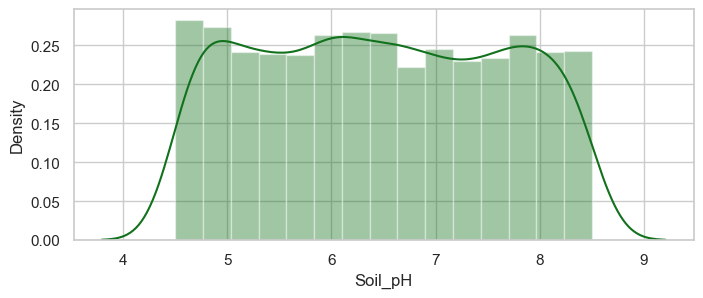

In [15]:
sns.distplot(soil.Soil_pH,color='g')

<Axes: xlabel='Pollutant_Concentration_mg_kg', ylabel='Density'>

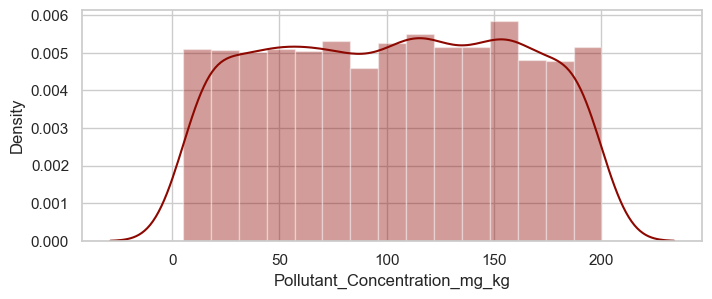

In [16]:
sns.distplot(soil.Pollutant_Concentration_mg_kg	,color='r')

<Axes: xlabel='Rainfall_mm', ylabel='Density'>

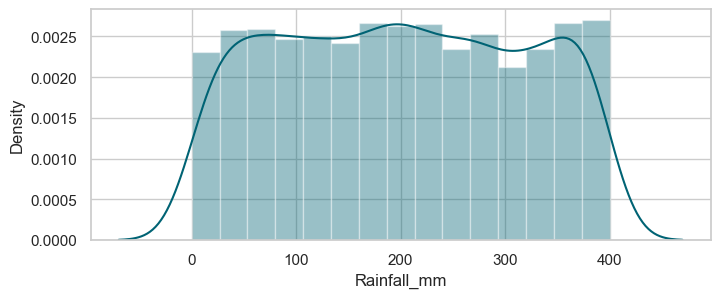

In [17]:
sns.distplot(soil.Rainfall_mm,color='c')

<Axes: xlabel='Temperature_C', ylabel='Density'>

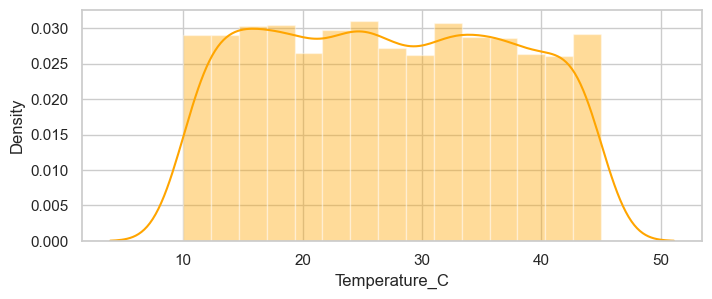

In [18]:
sns.distplot(soil.Temperature_C,color='orange')

<Axes: xlabel='Soil_Organic_Matter', ylabel='Density'>

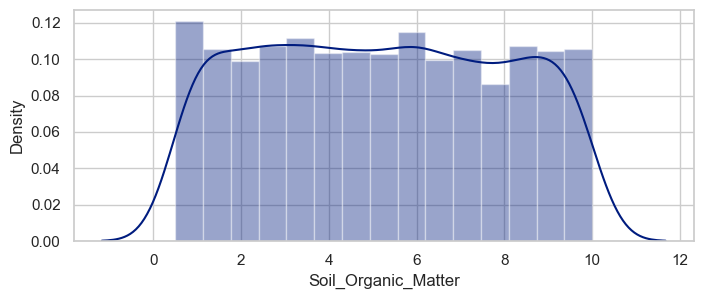

In [19]:
sns.distplot(soil.Soil_Organic_Matter,color='b')

<Axes: xlabel='Humidity', ylabel='Density'>

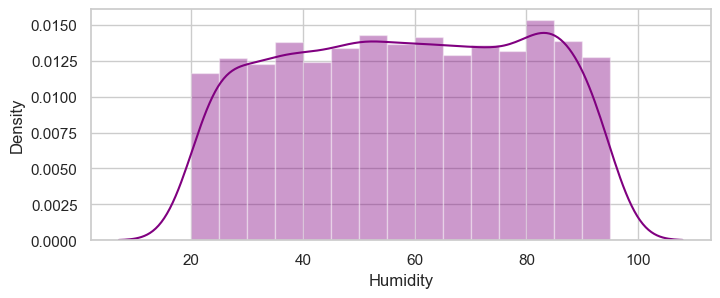

In [20]:
sns.distplot(soil.Humidity,color='purple')

In [21]:
soil.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity  \
0                          78.04     8.30           35.6      64.9   
1                          16.33     7.96           31.0      73.1   
2                         167.33     5.35           16.4      33.8   
3                          89.23     5.66           31.4      30.5   
4                          93.93     7.64           17.0      58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter  \
0         62.4  ...        Sandy                1.98   
1          8.2  ...        Silty                9.71   
2        121.7  ...         Clay                5.49   
3        116.9  ...        Silty                3.98   
4        237.0  ...        Loamy                0.94   

               Disease_Type Disease_Severity       Health_Symptoms  \
0  Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                    Cancer             Mild  Breathing Difficulty   
2  Gastrointestinal Disease           Severe                Nausea   
3     Neurological Disorder           Severe               Fatigue   
4              Skin Disease         Moderate  Breathing Difficulty   

   Age_Group_Affected Gender_Most_Affected     Mitigation_Measure  \
0              Adults                 Male  Government Regulation   
1             Elderly                 Both    Community Awareness   
2            Children                 Both       Soil Remediation   
3              Adults                 Male    Community Awareness   
4            Children               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  
0            No                Yes  
1           Yes                 No  
2           Yes                 No  
3           Yes                 No  
4           Yes                Yes  

[5 rows x 24 columns]

<Axes: xlabel='Region', ylabel='count'>

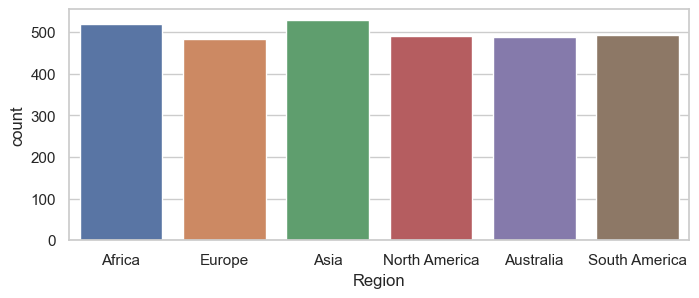

In [22]:
sns.countplot(data=soil,x='Region',palette='deep')

<Axes: xlabel='Country', ylabel='count'>

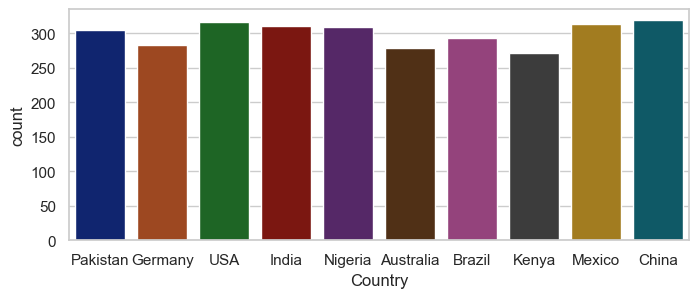

In [23]:
sns.countplot(data=soil,x='Country',palette='dark')

<Axes: xlabel='Pollutant_Type', ylabel='count'>

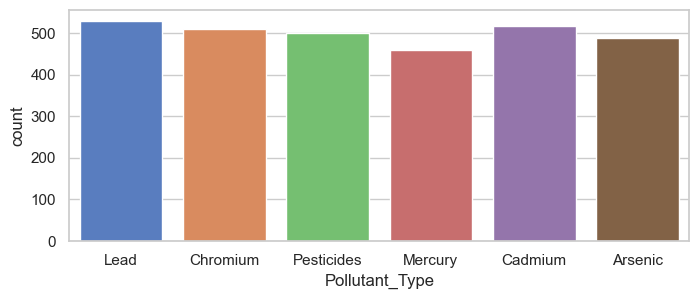

In [24]:
sns.countplot(data=soil,x='Pollutant_Type',palette='muted')

<Axes: xlabel='Disease_Type', ylabel='count'>

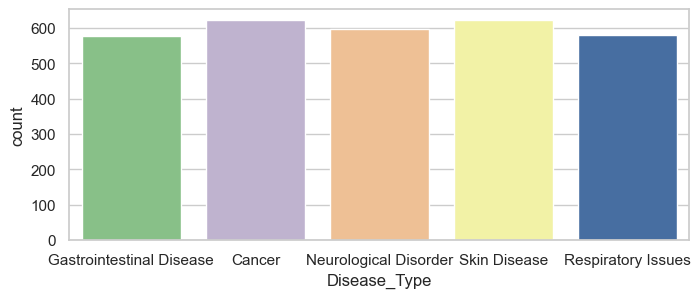

In [25]:
sns.countplot(data=soil,x='Disease_Type',palette='Accent')

<Axes: xlabel='Disease_Severity', ylabel='count'>

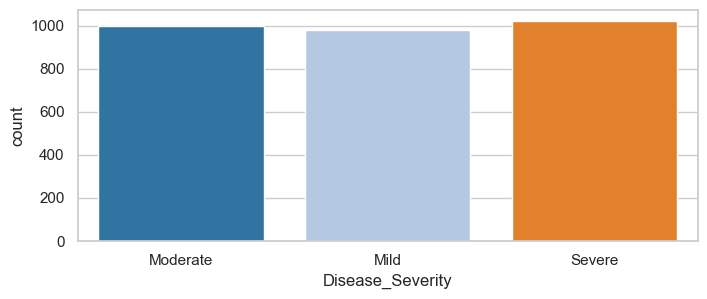

In [26]:
sns.countplot(data=soil,x='Disease_Severity',palette='tab20')

<Axes: xlabel='Health_Symptoms', ylabel='count'>

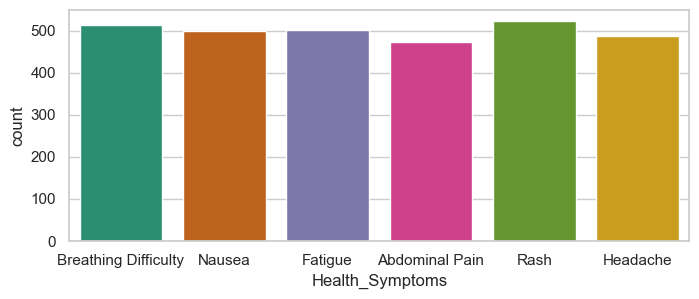

In [27]:
sns.countplot(data=soil,x='Health_Symptoms',palette='Dark2')

<Axes: xlabel='Age_Group_Affected', ylabel='count'>

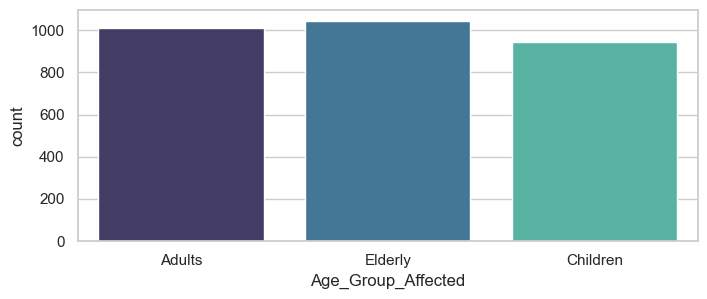

In [28]:
sns.countplot(data=soil,x='Age_Group_Affected',palette='mako')

<Axes: xlabel='Gender_Most_Affected', ylabel='count'>

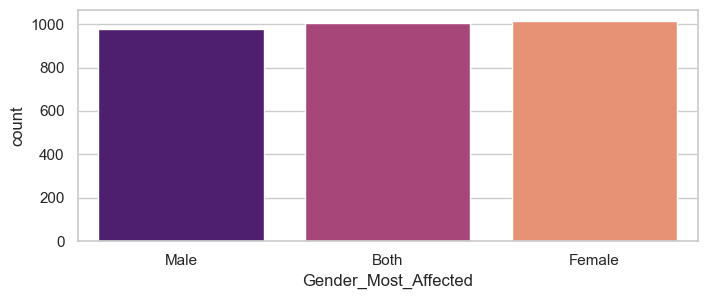

In [29]:
sns.countplot(data=soil,x='Gender_Most_Affected',palette='magma')

<Axes: xlabel='Mitigation_Measure', ylabel='count'>

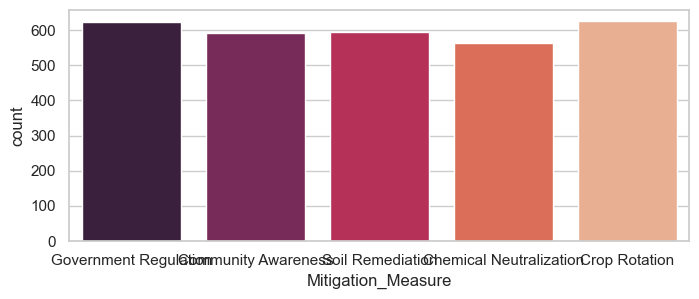

In [30]:
sns.countplot(data=soil,x='Mitigation_Measure',palette='rocket')

In [31]:
soil.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity  \
0                          78.04     8.30           35.6      64.9   
1                          16.33     7.96           31.0      73.1   
2                         167.33     5.35           16.4      33.8   
3                          89.23     5.66           31.4      30.5   
4                          93.93     7.64           17.0      58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter  \
0         62.4  ...        Sandy                1.98   
1          8.2  ...        Silty                9.71   
2        121.7  ...         Clay                5.49   
3        116.9  ...        Silty                3.98   
4        237.0  ...        Loamy                0.94   

               Disease_Type Disease_Severity       Health_Symptoms  \
0  Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                    Cancer             Mild  Breathing Difficulty   
2  Gastrointestinal Disease           Severe                Nausea   
3     Neurological Disorder           Severe               Fatigue   
4              Skin Disease         Moderate  Breathing Difficulty   

   Age_Group_Affected Gender_Most_Affected     Mitigation_Measure  \
0              Adults                 Male  Government Regulation   
1             Elderly                 Both    Community Awareness   
2            Children                 Both       Soil Remediation   
3              Adults                 Male    Community Awareness   
4            Children               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  
0            No                Yes  
1           Yes                 No  
2           Yes                 No  
3           Yes                 No  
4           Yes                Yes  

[5 rows x 24 columns]

<Axes: xlabel='Region', ylabel='count'>

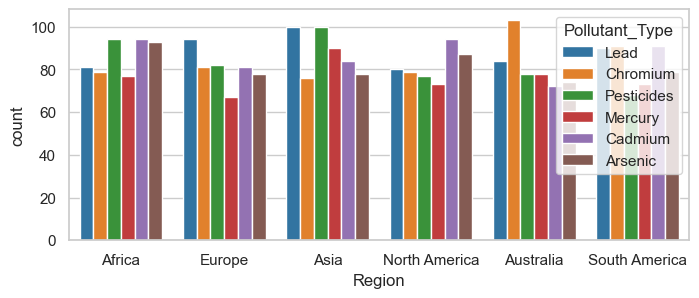

In [32]:
sns.countplot(data=soil,x='Region',palette='tab10',hue='Pollutant_Type')

<Axes: xlabel='Country', ylabel='count'>

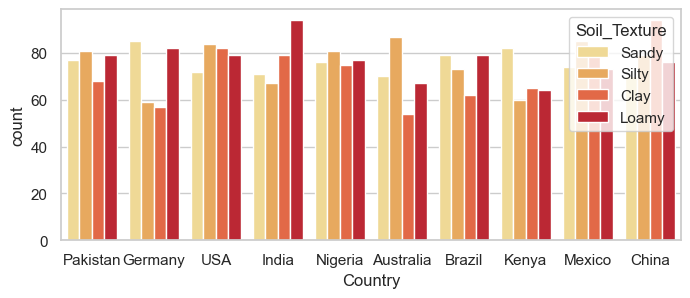

In [33]:
sns.countplot(data=soil,x='Country',palette='YlOrRd',hue='Soil_Texture')

<Axes: xlabel='Disease_Type', ylabel='count'>

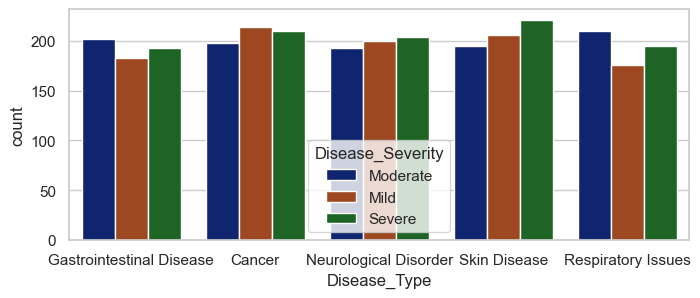

In [34]:
sns.countplot(data=soil,x='Disease_Type',palette='dark',hue='Disease_Severity')

<Axes: xlabel='Region', ylabel='count'>

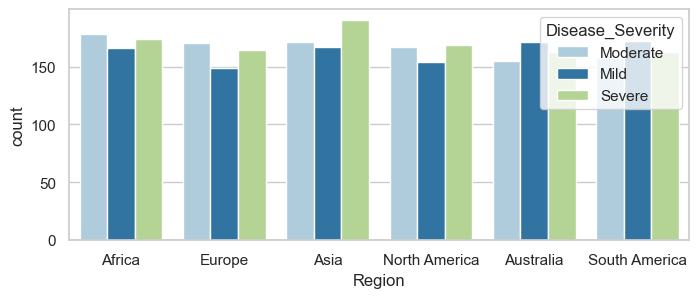

In [35]:
sns.countplot(data=soil,x='Region',palette='Paired',hue='Disease_Severity')

<Axes: xlabel='Country', ylabel='count'>

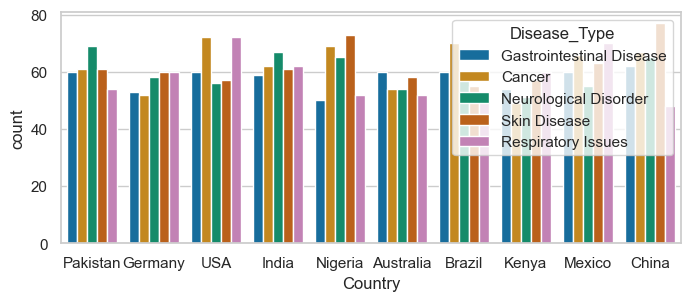

In [36]:
sns.countplot(data=soil,x='Country',palette='colorblind',hue='Disease_Type')

<Axes: xlabel='Disease_Type', ylabel='count'>

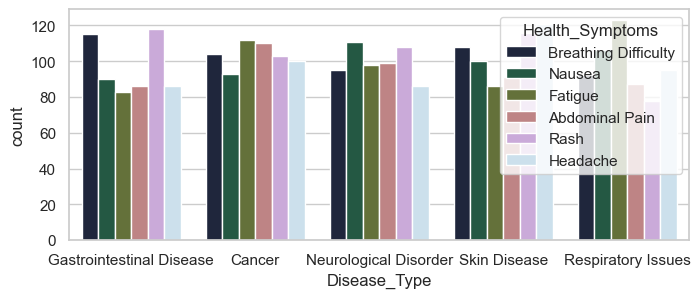

In [37]:
sns.countplot(data=soil,x='Disease_Type',palette='cubehelix',hue='Health_Symptoms')

<Axes: xlabel='Age_Group_Affected', ylabel='count'>

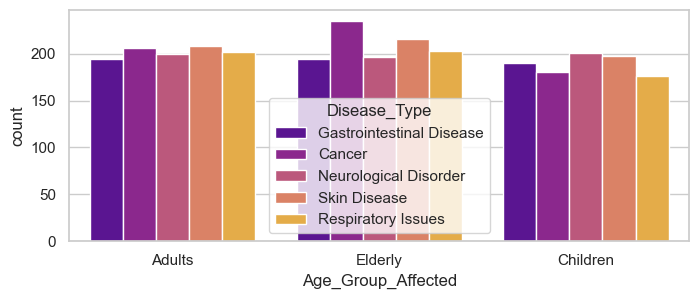

In [38]:
sns.countplot(data=soil,x='Age_Group_Affected',palette='plasma',hue='Disease_Type')

<Axes: xlabel='Disease_Type', ylabel='count'>

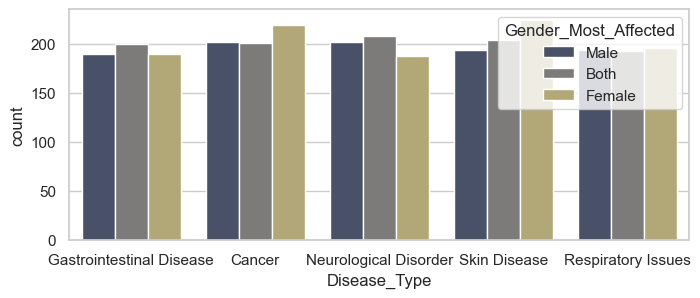

In [39]:
sns.countplot(data=soil,x='Disease_Type',palette='cividis',hue='Gender_Most_Affected')

<Axes: xlabel='Health_Symptoms', ylabel='count'>

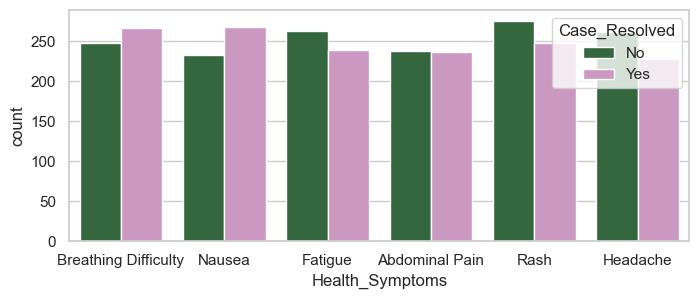

In [40]:
sns.countplot(data=soil,x='Health_Symptoms',palette='cubehelix',hue='Case_Resolved')

<Axes: xlabel='Country', ylabel='count'>

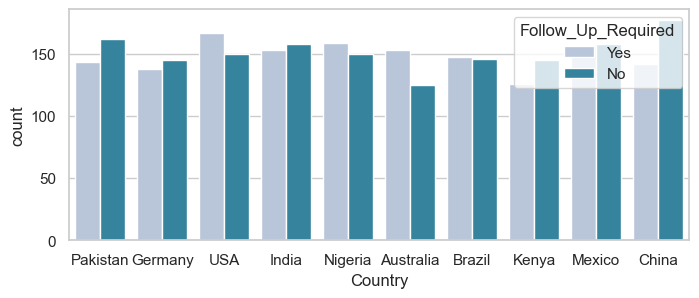

In [41]:
sns.countplot(data=soil,x='Country',palette='PuBuGn',hue='Follow_Up_Required')

In [42]:
soil.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity  \
0                          78.04     8.30           35.6      64.9   
1                          16.33     7.96           31.0      73.1   
2                         167.33     5.35           16.4      33.8   
3                          89.23     5.66           31.4      30.5   
4                          93.93     7.64           17.0      58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter  \
0         62.4  ...        Sandy                1.98   
1          8.2  ...        Silty                9.71   
2        121.7  ...         Clay                5.49   
3        116.9  ...        Silty                3.98   
4        237.0  ...        Loamy                0.94   

               Disease_Type Disease_Severity       Health_Symptoms  \
0  Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                    Cancer             Mild  Breathing Difficulty   
2  Gastrointestinal Disease           Severe                Nausea   
3     Neurological Disorder           Severe               Fatigue   
4              Skin Disease         Moderate  Breathing Difficulty   

   Age_Group_Affected Gender_Most_Affected     Mitigation_Measure  \
0              Adults                 Male  Government Regulation   
1             Elderly                 Both    Community Awareness   
2            Children                 Both       Soil Remediation   
3              Adults                 Male    Community Awareness   
4            Children               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  
0            No                Yes  
1           Yes                 No  
2           Yes                 No  
3           Yes                 No  
4           Yes                Yes  

[5 rows x 24 columns]

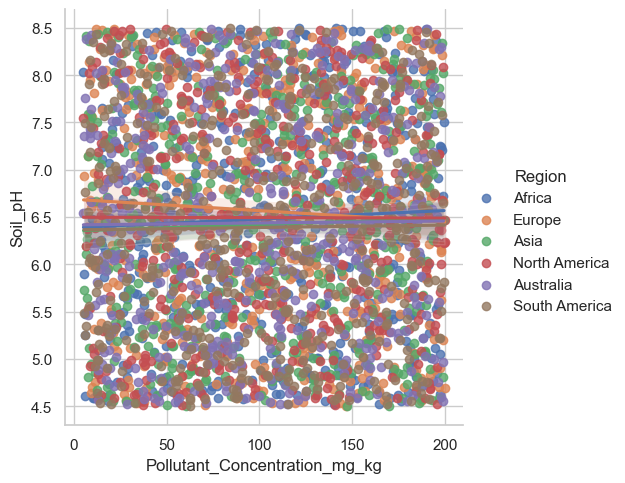

In [43]:
sns.lmplot(data=soil,x='Pollutant_Concentration_mg_kg',y='Soil_pH',palette='deep',hue='Region')

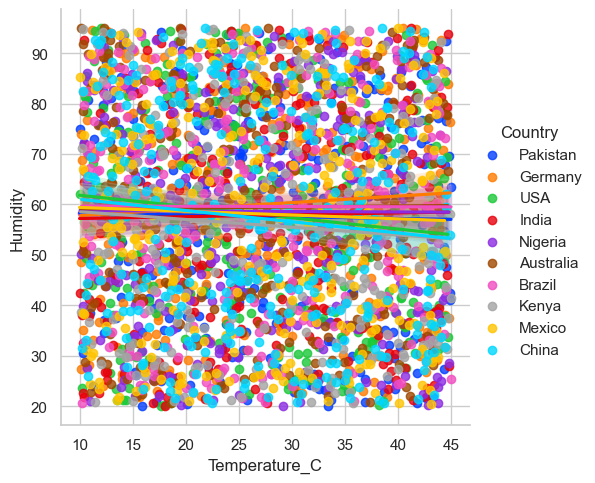

In [44]:
sns.lmplot(data=soil,x='Temperature_C',y='Humidity',palette='bright',hue='Country')

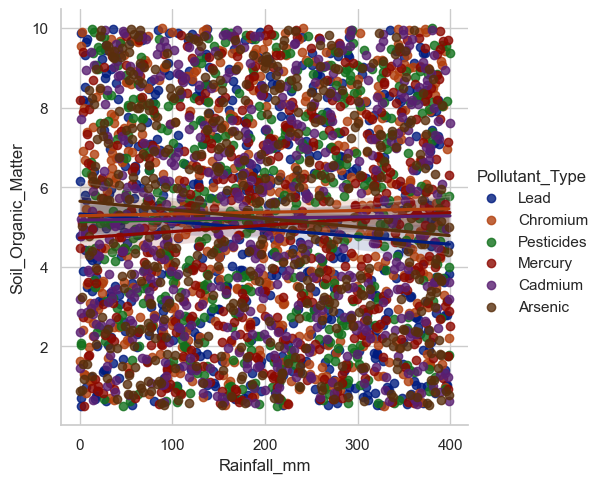

In [45]:
sns.lmplot(data=soil,x='Rainfall_mm',y='Soil_Organic_Matter',palette='dark',hue='Pollutant_Type')

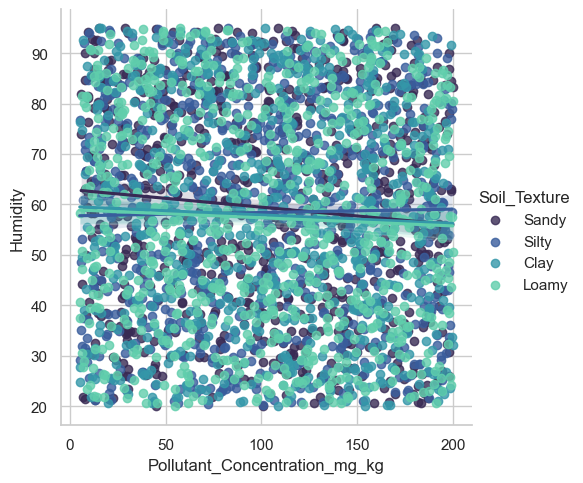

In [46]:
sns.lmplot(data=soil,x='Pollutant_Concentration_mg_kg',y='Humidity',palette='mako',hue='Soil_Texture')

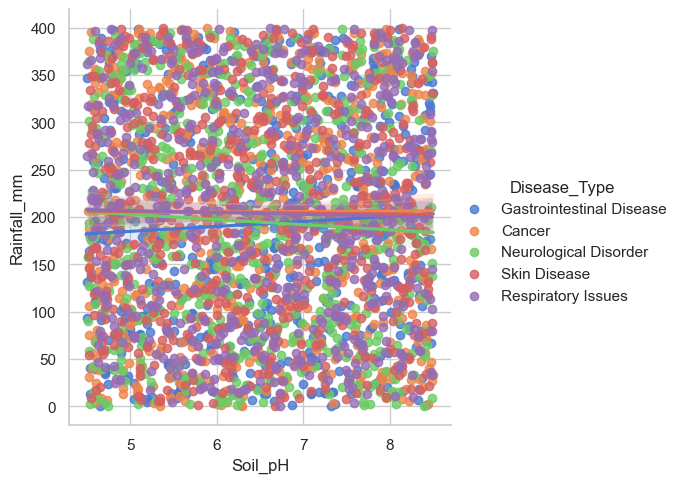

In [47]:
sns.lmplot(data=soil,x='Soil_pH',y='Rainfall_mm',palette='muted',hue='Disease_Type')

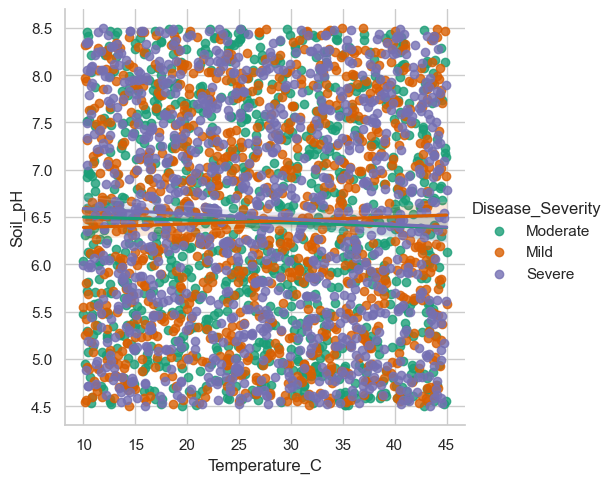

In [48]:
sns.lmplot(data=soil,x='Temperature_C',y='Soil_pH',palette='Dark2',hue='Disease_Severity')

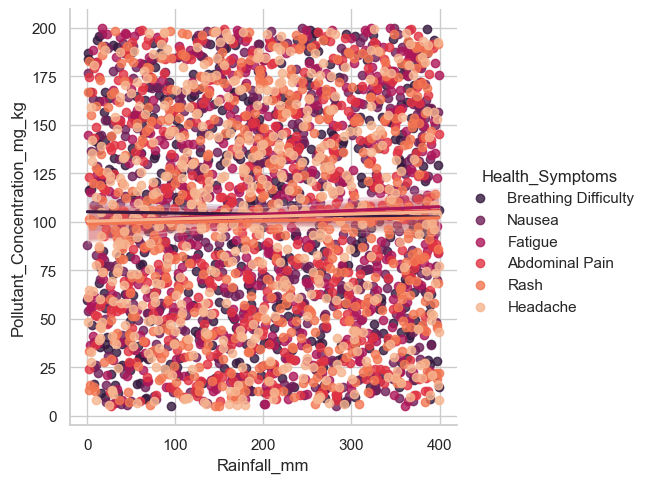

In [49]:
sns.lmplot(data=soil,x='Rainfall_mm',y='Pollutant_Concentration_mg_kg',palette='rocket',hue='Health_Symptoms')

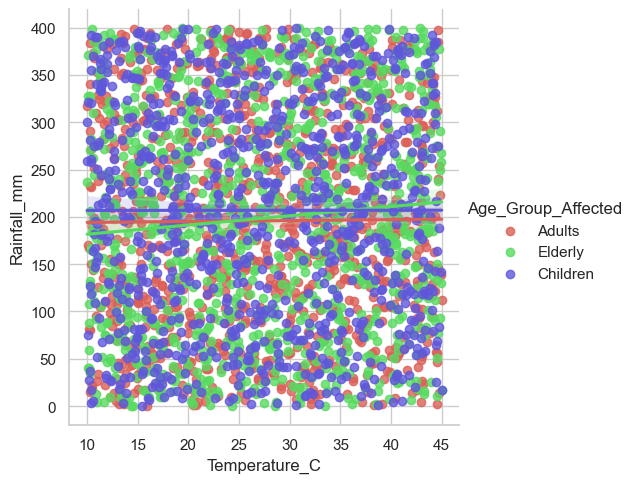

In [50]:
sns.lmplot(data=soil,x='Temperature_C',y='Rainfall_mm',palette='hls',hue='Age_Group_Affected')

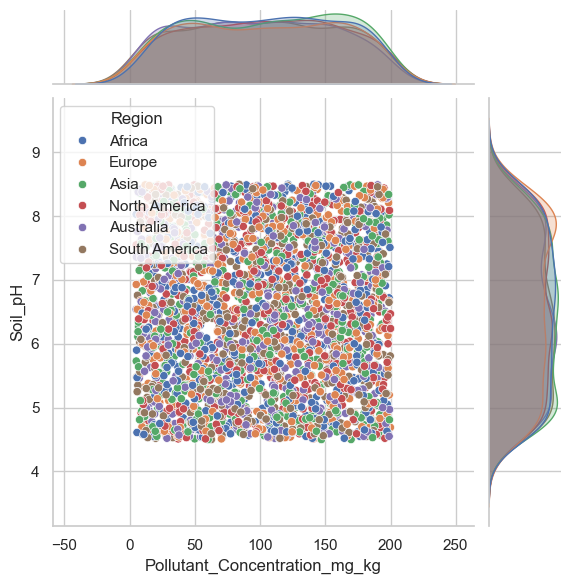

In [51]:
sns.jointplot(data=soil,x='Pollutant_Concentration_mg_kg',y='Soil_pH',palette='deep',hue='Region')

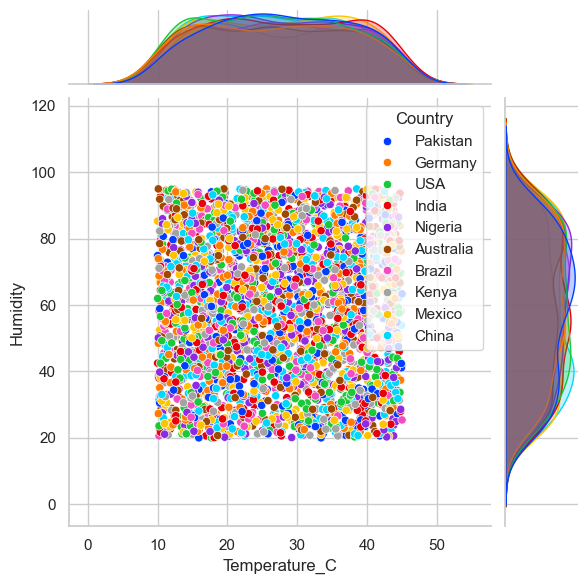

In [52]:
sns.jointplot(data=soil,x='Temperature_C',y='Humidity',palette='bright',hue='Country')

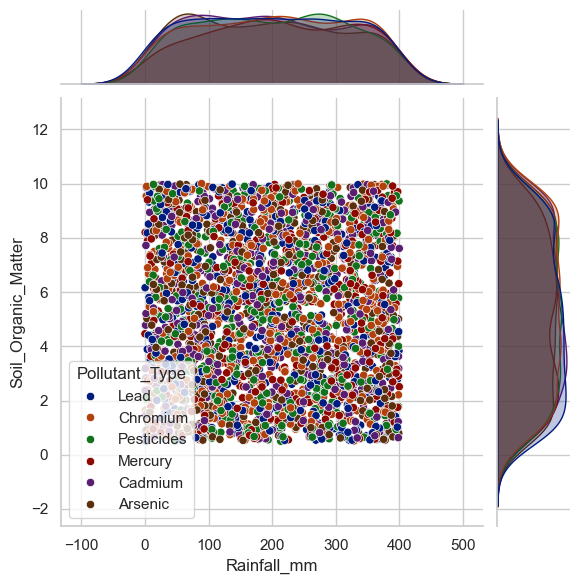

In [53]:
sns.jointplot(data=soil,x='Rainfall_mm',y='Soil_Organic_Matter',palette='dark',hue='Pollutant_Type')

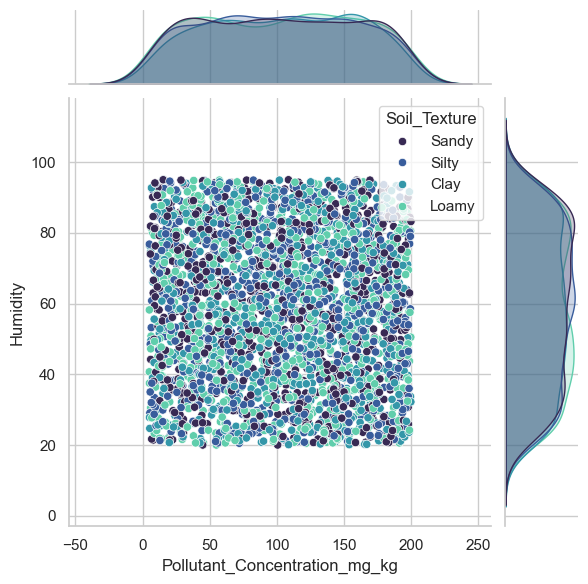

In [54]:
sns.jointplot(data=soil,x='Pollutant_Concentration_mg_kg',y='Humidity',palette='mako',hue='Soil_Texture')

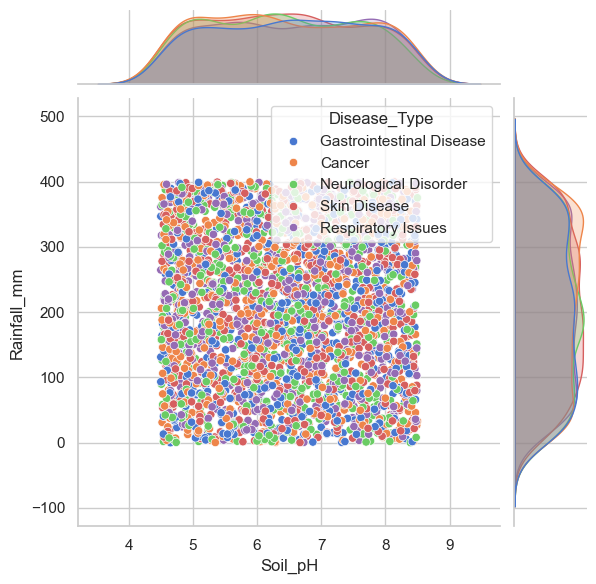

In [55]:
sns.jointplot(data=soil,x='Soil_pH',y='Rainfall_mm',palette='muted',hue='Disease_Type')

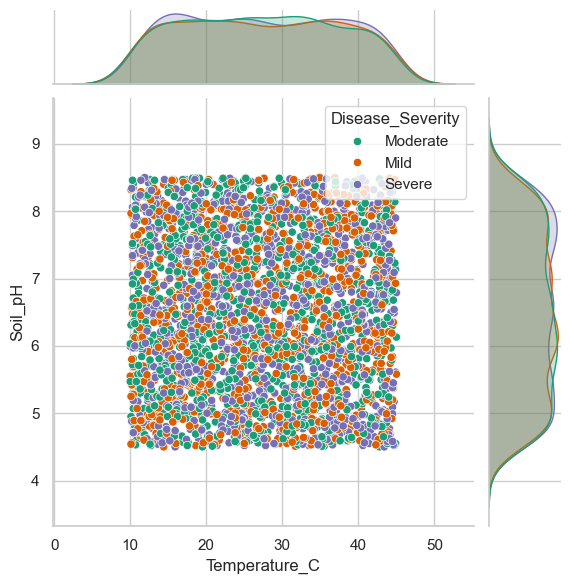

In [56]:
sns.jointplot(data=soil,x='Temperature_C',y='Soil_pH',palette='Dark2',hue='Disease_Severity')

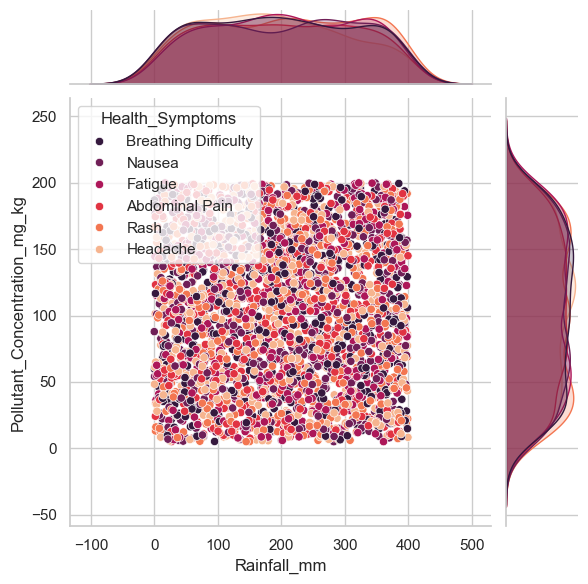

In [57]:
sns.jointplot(data=soil,x='Rainfall_mm',y='Pollutant_Concentration_mg_kg',palette='rocket',hue='Health_Symptoms')

In [58]:
soil.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity  \
0                          78.04     8.30           35.6      64.9   
1                          16.33     7.96           31.0      73.1   
2                         167.33     5.35           16.4      33.8   
3                          89.23     5.66           31.4      30.5   
4                          93.93     7.64           17.0      58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter  \
0         62.4  ...        Sandy                1.98   
1          8.2  ...        Silty                9.71   
2        121.7  ...         Clay                5.49   
3        116.9  ...        Silty                3.98   
4        237.0  ...        Loamy                0.94   

               Disease_Type Disease_Severity       Health_Symptoms  \
0  Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                    Cancer             Mild  Breathing Difficulty   
2  Gastrointestinal Disease           Severe                Nausea   
3     Neurological Disorder           Severe               Fatigue   
4              Skin Disease         Moderate  Breathing Difficulty   

   Age_Group_Affected Gender_Most_Affected     Mitigation_Measure  \
0              Adults                 Male  Government Regulation   
1             Elderly                 Both    Community Awareness   
2            Children                 Both       Soil Remediation   
3              Adults                 Male    Community Awareness   
4            Children               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  
0            No                Yes  
1           Yes                 No  
2           Yes                 No  
3           Yes                 No  
4           Yes                Yes  

[5 rows x 24 columns]

<Axes: xlabel='Region', ylabel='Pollutant_Concentration_mg_kg'>

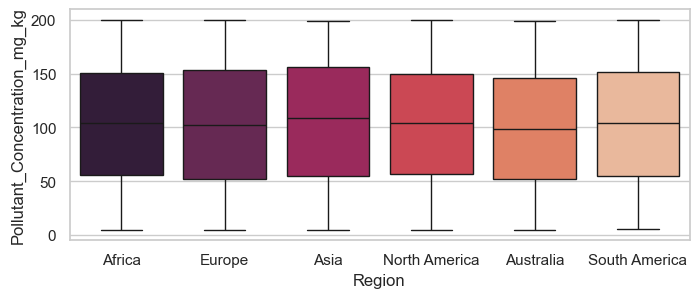

In [59]:
sns.boxplot(data=soil,x='Region',y='Pollutant_Concentration_mg_kg',palette='rocket')

<Axes: xlabel='Country', ylabel='Soil_pH'>

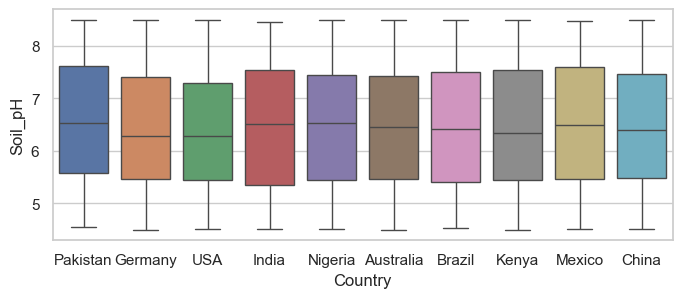

In [60]:
sns.boxplot(data=soil,x='Country',y='Soil_pH',palette='deep')

<Axes: xlabel='Pollutant_Type', ylabel='Temperature_C'>

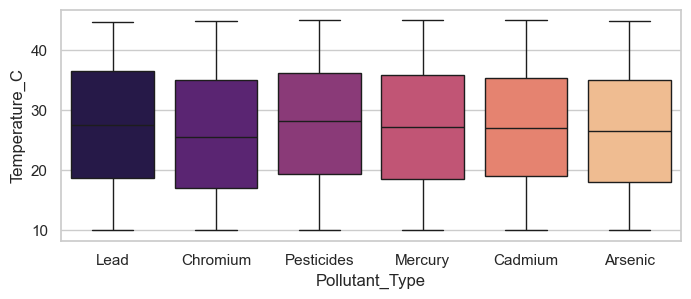

In [61]:
sns.boxplot(data=soil,x='Pollutant_Type',y='Temperature_C',palette='magma')

<Axes: xlabel='Disease_Type', ylabel='Humidity'>

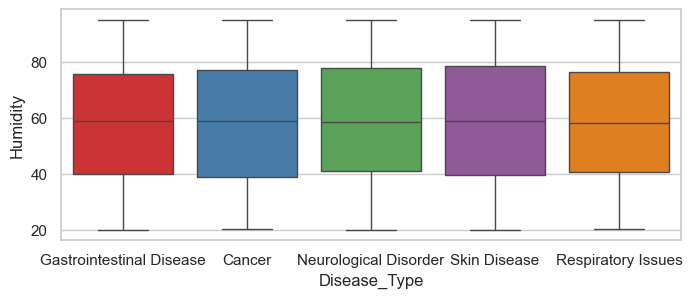

In [62]:
sns.boxplot(data=soil,x='Disease_Type',y='Humidity',palette='Set1')

<Axes: xlabel='Disease_Severity', ylabel='Rainfall_mm'>

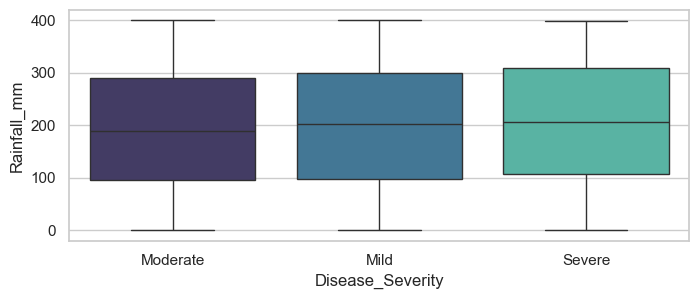

In [63]:
sns.boxplot(data=soil,x='Disease_Severity',y='Rainfall_mm',palette='mako')

<Axes: xlabel='Health_Symptoms', ylabel='Soil_Organic_Matter'>

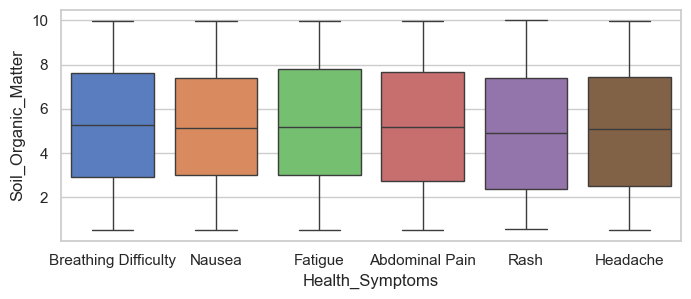

In [64]:
sns.boxplot(data=soil,x='Health_Symptoms',y='Soil_Organic_Matter',palette='muted')

<Axes: xlabel='Age_Group_Affected', ylabel='Soil_pH'>

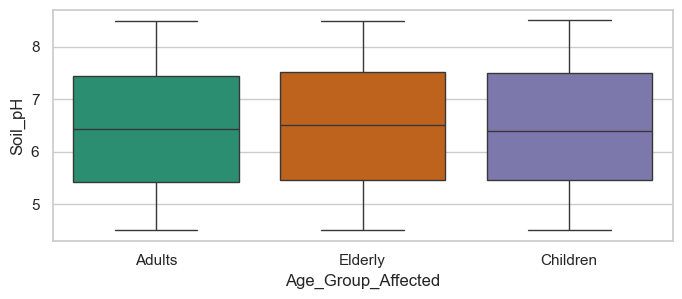

In [65]:
sns.boxplot(data=soil,x='Age_Group_Affected',y='Soil_pH',palette='Dark2')

<Axes: xlabel='Gender_Most_Affected', ylabel='Humidity'>

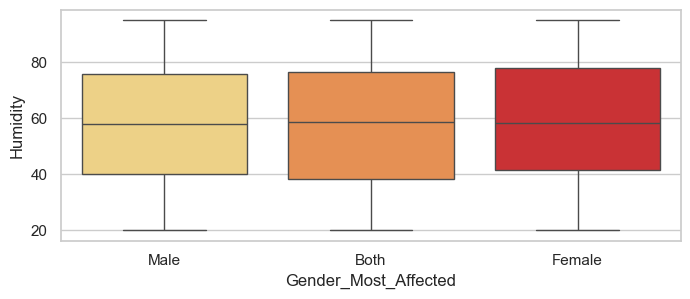

In [66]:
sns.boxplot(data=soil,x='Gender_Most_Affected',y='Humidity',palette='YlOrRd')

<Axes: xlabel='Mitigation_Measure', ylabel='Rainfall_mm'>

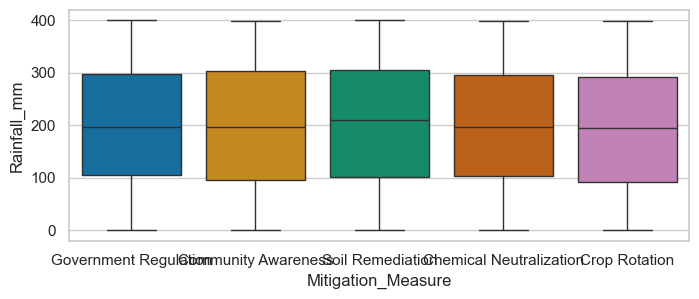

In [67]:
sns.boxplot(data=soil,x='Mitigation_Measure',y='Rainfall_mm',palette='colorblind')